In [14]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [15]:
#descargar los datos e identificar los directorios doonde están
URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=URL, extract=True)

print(zip_dir)
zip_dir_base = os.path.dirname(zip_dir)

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

C:\Users\nargel\.keras\datasets\cats_and_dogs_filterted.zip


In [20]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=2000,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary')

val_data_gen=validation_image_generator.flow_from_directory(batch_size=1000,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(150,150),
                                                           class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


0.0


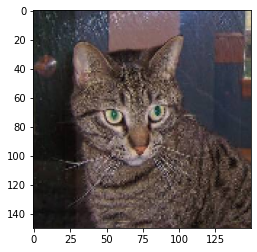

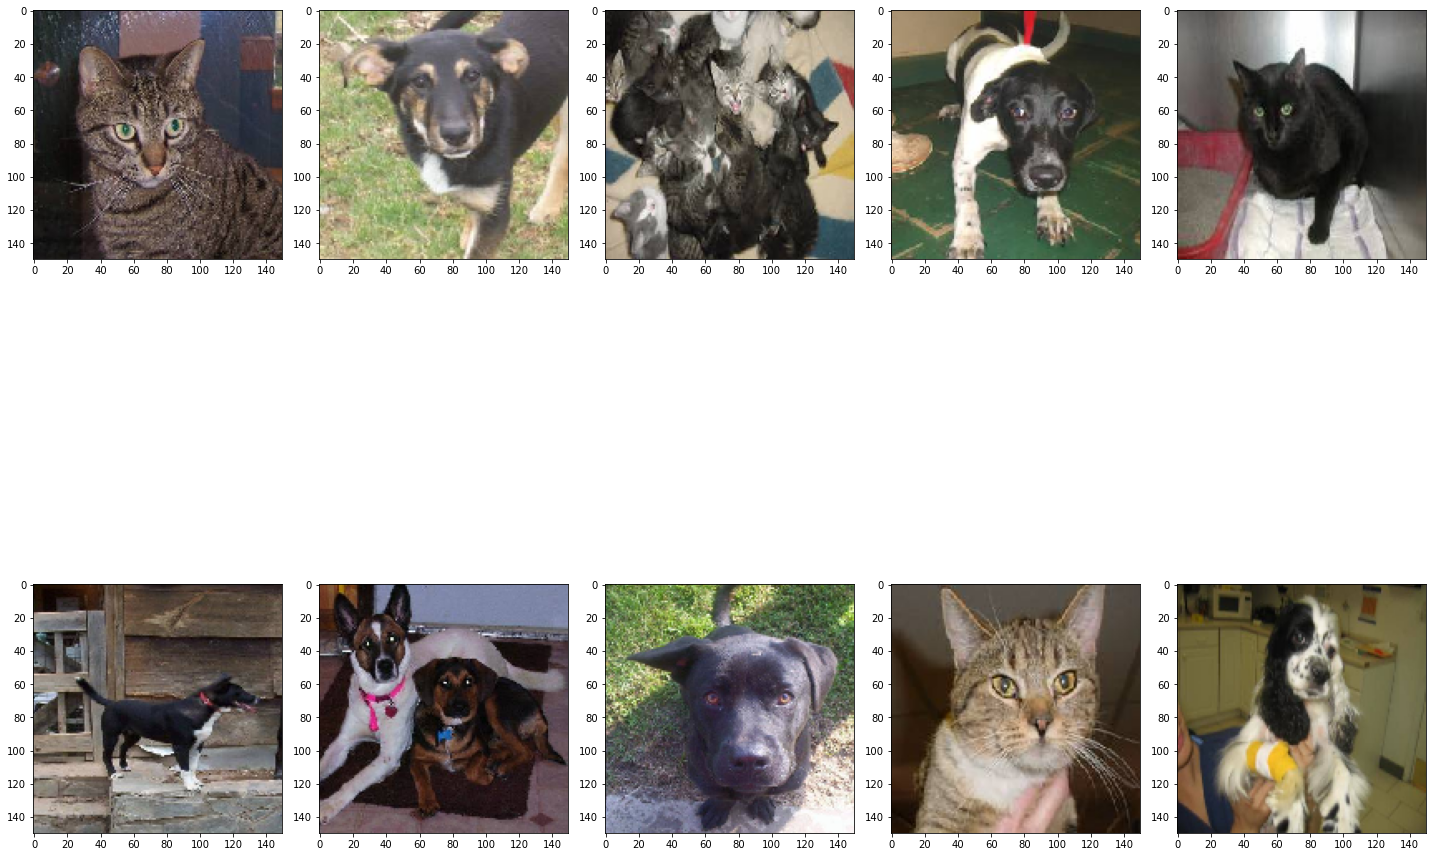

In [21]:
#para visualizar las imagenes

training_images, training_labels = next(train_data_gen) 


test_images, test_labels = next(val_data_gen) 

plt.imshow(training_images[0])
print(training_labels[0])

def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(training_images[:10])  # Plot images 0-9


In [40]:
#crear red neuronal

model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='tanh'),
    tf.keras.layers.Dense(240,activation='tanh'),
    
    
    tf.keras.layers.Dense(2,activation='softmax')
    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 256)      

In [42]:

model.fit(training_images, training_labels,epochs=15)
test_loss = model.evaluate(test_images, test_labels)

Train on 2000 samples
Epoch 1/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6917 - accuracy: 0.5085
Epoch 2/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6915 - accuracy: 0.5340
Epoch 3/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6929 - accuracy: 0.5250
Epoch 4/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6941 - accuracy: 0.4940
Epoch 5/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6924 - accuracy: 0.4980
Epoch 6/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6892 - accuracy: 0.5370
Epoch 7/15
2000/2000 [==============================] - 32s 16ms/sample - loss: 0.6905 - accuracy: 0.5350
Epoch 8/15
2000/2000 [==============================] - 31s 16ms/sample - loss: 0.6806 - accuracy: 0.5465
Epoch 9/15
2000/2000 [==============================] - 32s 16ms/sample - loss: 0.6548 - accuracy: 0.6330
Epoch 10/15
2000/2000 [=

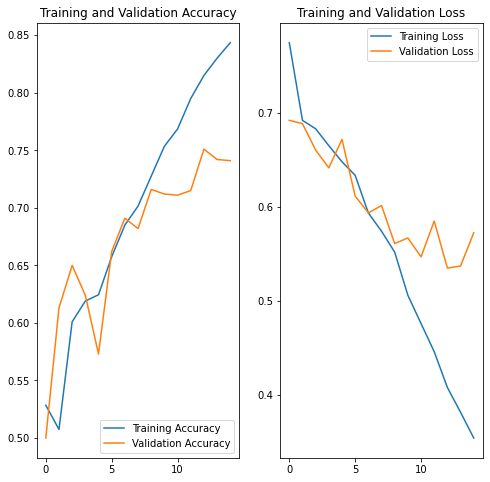

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

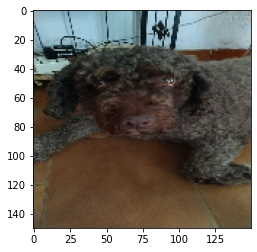

In [43]:
from tensorflow.keras.preprocessing.image import load_img
# cargar una imagen desde un archivo
image = load_img('saga.jpg', target_size=(150, 150))
image2 = load_img('perro.jpg', target_size=(150, 150))
image3 =load_img('salm.jpg', target_size=(150, 150))

pix = np.array(image.getdata()).reshape(image.size[0], image.size[1], 3)
pix= pix /255.0 #normalizar imagen

pix2 = np.array(image2.getdata()).reshape(image2.size[0], image2.size[1], 3)
pix2= pix2 /255.0 #normalizar imagen


pix3 = np.array(image3.getdata()).reshape(image3.size[0], image3.size[1], 3)
pix3= pix3 /255.0 #normalizar imagen
#pix = np.expand_dims(pix, axis=0)

plt.imshow(pix3)

In [44]:

pix = np.expand_dims(pix, axis=0)

pix2 = np.expand_dims(pix2, axis=0)

pix3 = np.expand_dims(pix3, axis=0)

model.predict(pix)#prueba con la gata de mi pareja



array([[0.9937873 , 0.00621277]], dtype=float32)

In [45]:
model.predict(pix2)#prueba con un perro de internet

array([[0.10308129, 0.8969187 ]], dtype=float32)

In [46]:
model.predict(pix3)#prueba con perro de salmeron

array([[0.9319229 , 0.06807712]], dtype=float32)